In [1]:
import pandas as pd

data = pd.read_csv('training_data_slide.csv', header=0)
print(data, 5)

       diffpress  flowrate  holedepth  manual_slide  hookload  pumppress  \
0          45.22    596.00    12677.0             0     211.3    3797.28   
1          29.53    596.00    12678.0             0     211.0    3781.64   
2         114.45    596.00    12678.5             0     206.6    3866.49   
3         298.49    596.00    12680.0             0     195.7    4050.56   
4         414.58    596.00    12681.5             0     192.2    4166.69   
...          ...       ...        ...           ...       ...        ...   
66617     849.09    550.17    15738.5             0     119.1    5755.63   
66618     851.60    550.18    15739.0             0     119.4    5758.15   
66619     838.91    548.69    15739.5             0     118.7    5745.45   
66620     851.29    550.18    15740.0             0     118.8    5757.84   
66621     480.21    556.13    15740.5             0     129.4    5386.76   

       rotrpm  torque   wob  
0       59.90   7.900  -0.2  
1       58.90   8.400   0.3

In [2]:
from pycaret.classification import *

In [4]:
s = setup(data, target = 'manual_slide', session_id = 123)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(66622, 9)"
4,Missing Values,False
5,Numeric Features,8
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [5]:
compare_models(blacklist['lda'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Extra Trees Classifier,0.997100,0.997700,0.991100,0.988000,0.989600,0.987800
1,Extreme Gradient Boosting,0.997100,0.997700,0.990700,0.988400,0.989500,0.987800
2,Light Gradient Boosting Machine,0.997100,0.997600,0.990200,0.989500,0.989800,0.988200
3,Random Forest Classifier,0.996800,0.997300,0.988200,0.989300,0.988800,0.986900
4,Gradient Boosting Classifier,0.996400,0.997800,0.986100,0.987900,0.987000,0.984900
5,Decision Tree Classifier,0.995200,0.989500,0.981700,0.984200,0.982900,0.980200
6,Ada Boost Classifier,0.993100,0.997400,0.970500,0.979800,0.975100,0.971100
7,Logistic Regression,0.990000,0.994800,0.948500,0.979800,0.963900,0.958100
8,Ridge Classifier,0.985600,0.000000,0.916900,0.979300,0.947000,0.938700
9,K Neighbors Classifier,0.984300,0.991100,0.964500,0.926400,0.945000,0.935900


In [13]:
lgb=create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9981,0.9978,0.9939,0.9924,0.9931,0.9920
1,0.9976,0.9960,0.9908,0.9924,0.9916,0.9902
2,0.9966,0.9972,0.9924,0.9834,0.9878,0.9858
3,0.9974,0.9974,0.9908,0.9908,0.9908,0.9893
4,0.9974,0.9972,0.9924,0.9893,0.9909,0.9894
5,0.9972,0.9999,0.9924,0.9878,0.9901,0.9885
6,0.9976,0.9988,0.9924,0.9908,0.9916,0.9902
7,0.9964,0.9968,0.9908,0.9833,0.9871,0.9849
8,0.9959,0.9966,0.9847,0.9862,0.9855,0.9831
9,0.9964,0.9994,0.9862,0.9877,0.9870,0.9849


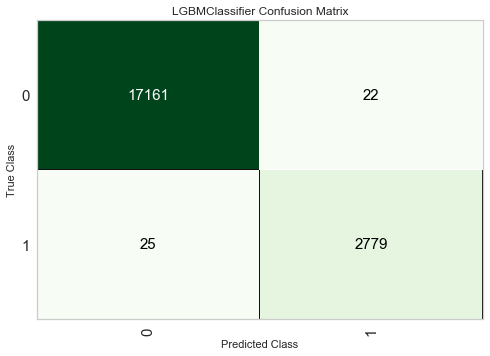

In [20]:
plot_model(lgb, plot='confusion_matrix')

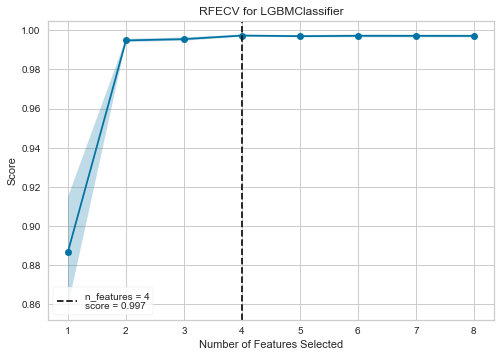

In [25]:
plot_model(lgb, plot='rfe')

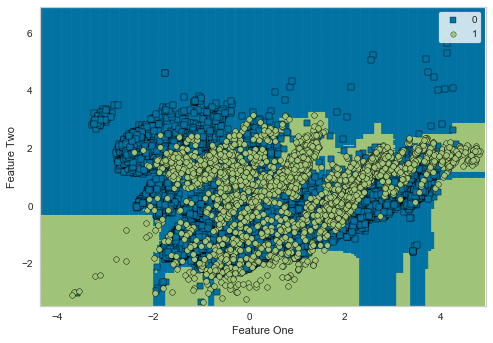

In [26]:
plot_model(lgb, plot='boundary')

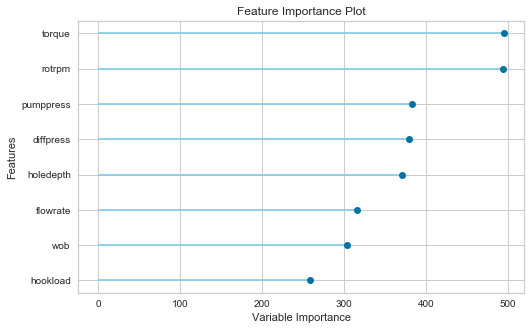

In [28]:
plot_model(lgb, plot='feature')

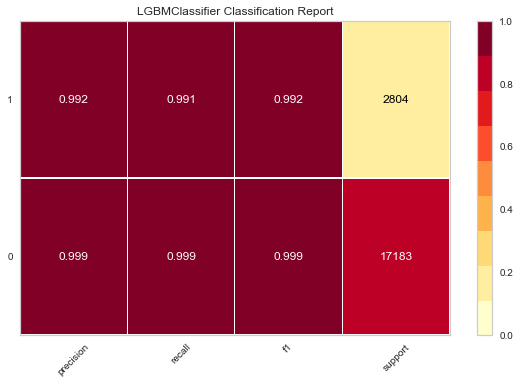

In [30]:
plot_model(lgb, plot='class_report')

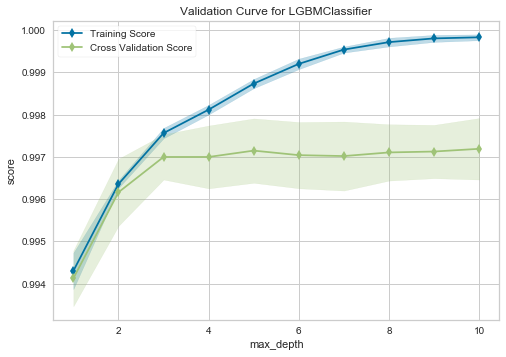

In [31]:
plot_model(lgb, plot='vc')

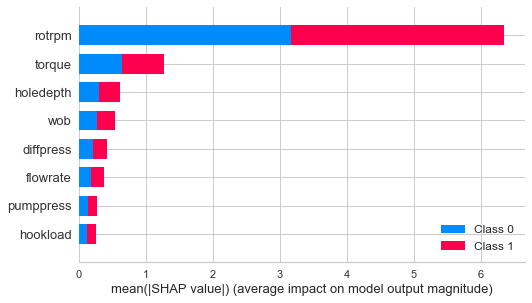

In [10]:
interpret_model(lgb)

In [16]:
save_model(lgb, 'deployment_slide_rotate')

Transformation Pipeline and Model Succesfully Saved


In [17]:
deployment_lgb = load_model('deployment_slide_rotate')

Transformation Pipeline and Model Sucessfully Loaded


In [36]:
deployment_lgb

[Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='manual_slide',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 numeric_strategy='mean',
                                 target_variable=None)),
                 ('new_levels1',
                  New_Catagoric...
                 ('group', Empty()), ('nonliner', Empty()), ('scaling', Empty()),
                 ('P_transform', Empty()), ('pt_target', Empty()),
                 ('binn', Empty()), ('rem_outliers', Empty()),
                 ('cluster_all', Empty()),
                 ('dummy', Dummify(target='manual_slide')),
                 ('fix_perfect', Remove_100(target='manual_slide')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', Empty()), ('fix_multi', Empty()),
                 ('dfs', Empty()), ('pca', Empty())],
          verbose=False),
 LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                importance_type='split', learning_rate=0.1, max_depth=-1,
                min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
                n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
                random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent=True,
                subsample=1.0, subsample_for_bin=200000, subsample_freq=0)]

In [33]:
data2=data.loc[2:5, data.columns != 'manual_slide']
print(data2, 5)

   diffpress  flowrate  holedepth  hookload  pumppress  rotrpm  torque   wob
2     114.45     596.0    12678.5     206.6    3866.49    59.8     8.9   4.9
3     298.49     596.0    12680.0     195.7    4050.56    59.7    12.6  15.2
4     414.58     596.0    12681.5     192.2    4166.69    58.8    15.4  18.9
5     496.69     596.0    12683.0     190.7    4248.75    60.1    14.2  20.1 5


In [62]:
predict=predict_model(deployment_lgb, data=data2)
print(predict.iloc[:, -2])

0    0
1    0
2    0
3    0
Name: Label, dtype: int32


In [63]:
print(predict)

   diffpress  flowrate  holedepth  hookload  pumppress  rotrpm  torque   wob  \
0     114.45     596.0    12678.5     206.6    3866.49    59.8     8.9   4.9   
1     298.49     596.0    12680.0     195.7    4050.56    59.7    12.6  15.2   
2     414.58     596.0    12681.5     192.2    4166.69    58.8    15.4  18.9   
3     496.69     596.0    12683.0     190.7    4248.75    60.1    14.2  20.1   

   Label   Score  
0      0  0.0469  
1      0  0.0021  
2      0  0.0087  
3      0  0.0017  


In [67]:
data2.columns

Index(['diffpress', 'flowrate', 'holedepth', 'hookload', 'pumppress', 'rotrpm',
       'torque', 'wob'],
      dtype='object')

In [69]:
import requests
url = 'http://127.0.0.1:5000/predict_api'
pred = requests.post(url,json={'diffpress':114.45, 'flowrate':596, 'holedepth':12678.5, 'hookload':206.6, 'pumppress':3866.49, 'rotrpm':59.8,
       'torque':8.9, 'wob':4.9})
print(pred.json())

0
